# Programming exercise Lesson 1.2

Choose one of the five discrete maps proposed at the end of the lesson (see the slides of Lesson 1 ) to apply the calculations and concepts that we discussed in class. Volunteers will present their results (and their difficulties!) when analyzing the map of their choice. Please keep in mind that this is part of your tasks in this course, so I recommend you to try to work out and present the exercises as early as possible.

A summary of the analysis might be as follows:

1. Identify the range of values of x that are biologically meaningful. You can look at the values of xn that return a positive (or zero) population size in the following iteration, xn+1≥0. In the logistic map, the domain of the map was [0,1]; however, other maps may have different domains.


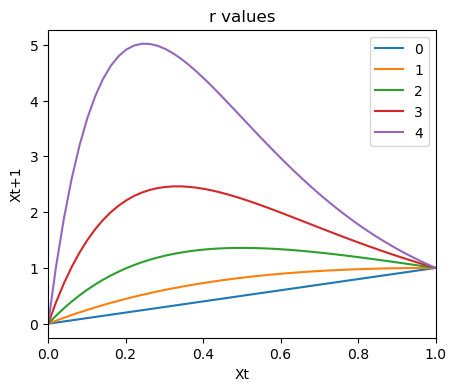

In [90]:
from matplotlib import pyplot as plt
import numpy as np

def plot_func(r_list):

    fig = plt.figure(dpi=100, figsize=(5, 4))
    x_list = np.linspace(0, 2, 100)

    for r in r_list:
        y_list = []
        
        for x in x_list:
            '''
            if x[i] < 1/2:                    # Tent map
                y = r*x[i]
            else:
                y = r*(1-x[i])
            '''
            #y = r*(x[i]**2)*(1-x[i])         # Cubic map

            #y = r*np.sin(np.pi*x[i])         # Sine map

            y = x*np.exp(r*(1-x))      # Exponential map  <==== I will work on the exponential map

            #y = (r*x[i])/(1+x[i])**b         # Quotient map

            y_list.append(y) 
        plt.plot(x_list,y_list)
        plt.xlim(0,1)
        plt.xlabel("Xt")
        plt.ylabel("Xt+1")
        plt.legend(r_list)
        plt.title("r values")

plot_func(r_list = list(range(5)))

I will proceed with the analysis of the **exponential model**. The domain of X in this model can be easily studied calculating *F(Xt+1)* > 0:


F(Xt+1) = Xt * exp(r * (1 - Xt)) ≥ 0   <===>    Xt * exp(r) * exp(-r * Xt) ≥ 0


Since the value of the exponential components of the function is always greater than 0, *F(Xt+1)* will always be greater or equal to 0 for *Xt ≥ 0*.


2. Identify the parameter regions that produce meaningful dynamics. For the logistic equation, we found that the parameter r must be between 0 and 4. This may be different for other maps. Hint: study the maxima and minima of the map function to identify values of the parameter for which the maximum (or minimum) xn+1 is beyond the limits of the domain.

To study the region of parameter *r* domain that produces meaningful results, we first identify maximum and minimum values, calculating *F'(Xt)* = 0. Thus, we obtain that:

*F'(Xt)* = (1 - r * Xt) * exp(r * (1 - Xt)) = 0

And if we simplify this expression (considering exponential > 0):

1 - r * Xt = 0 <=====> r = 1 / Xt

In [91]:
from sympy import *

X, r = symbols("X, r")
fx = X*exp(r*(1-X))
f1x = fx.diff(X)
print("First derivative:")
f1x

First derivative:


-X*r*exp(r*(1 - X)) + exp(r*(1 - X))

In [92]:
print("F'(Xt) = 0  <==>", "r =", solve(f1x, r))

F'(Xt) = 0  <==> r = [1/X]


Considering \[ 0 < *Xt* < Inf ), we can conclude that *r* cannot aquire a negative value within the function domain (*r* > 0). Further, *r* can never be equal to 0; in that case, *F'(Xt)* = 1, what means that *F(Xt)* would always remain constant after every iteration for every value of *Xt*.

When we plot the function with different *r* values, we see that Xt grows exponentially to infinite when r < 0.

(0.0, 3.0)

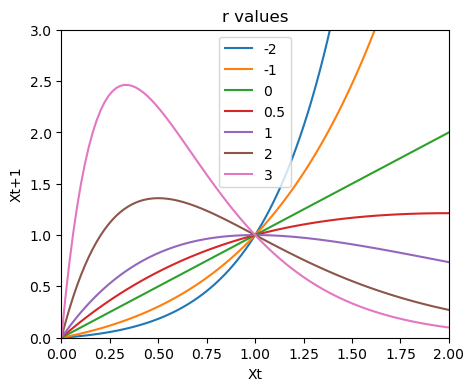

In [93]:
plot_func(r_list=[-2, -1, 0, 0.5, 1, 2, 3])
plt.xlim((0,2))
plt.ylim((0,3))

3. Calculate fixed points. Estimate their stability. Determine the values of the parameter characterizing the different dynamics. Hint: depending on which map you choose, it may be very difficult or impossible to solve it by hand. In those cases, you can use numerical root-finding methods (e.g. Newton-Raphson, bisection, etc) that are easy to implement in a computer. To gain some intuition, you can first plot the function that you want to solve by setting a few arbitrary values of the parameter.

F(Xt) = X*exp(r*(1 - X)) fixed points = [0, 1]


(0.0, 3.0)

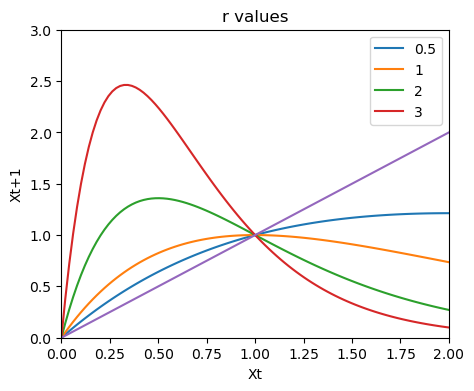

In [94]:
'''
F(Xt) = Xt <===> Xt = Xt * exp(r * (1 - Xt))

From this equation, we can deduce that the first fixed point corresponds to F(Xt) = 0

Xt = Xt * exp(r * (1 - Xt))   <===>   exp(r * (1 - Xt)) = 1   <===>   r * (1 - Xt) = 0

Therefore, fixed points for F(Xt) are F(Xt) = 0 and F(Xt) = 1

'''
fixed = [0,1]

print("F(Xt) =", fx, "fixed points =", fixed)

plot_func(r_list=[0.5, 1, 2, 3])
xy_line = plt.plot(range(10), range(10))            # Here I plot the X=Y line.
plt.xlim((0,2))
plt.ylim((0,3))

In order to identify the stability of fixed points, I calculated the derivative of *F(Xt)* at the fixed points so that |F'(Xt) < 1| means that the point is stable.


In [95]:
'''
F'(Xt) = (1 - r * Xt) * exp(r * (1 - Xt))

Case 1
F'(1) = (1 - r) * exp(r * (1 - 1)) = (1 - r) * exp(0) = 1 - r

| 1 - r | < 1   <===>   r > 0  and  r < 2

Case 2
F'(0) = (1 - 0) * exp(r * (1 - 0)) = exp(r)

| exp(r) | < 1   <===>   r < 0   This is not possible, since it does not produce meaningful results.

'''

print("Stable fixed points:   Xt =", 1)
print("Unstable fixed points:   Xt =", 0)

Stable fixed points:   Xt = 1
Unstable fixed points:   Xt = 0


4. Plot the dynamics of the system for different values of the relevant parameter. Try to identify regimes with a stable fixed point, period 2, 4 or other, and chaos. Hint: Try different initial values of x, especially if you choose the map f(x)=x2(1−x). I do not recommend starting from x0 = 0.5.

In [96]:
def plot_x_values(x_0,r,n_iter = 50):
    
    x_values = []
    x = x_0

    for i in range(n_iter):
        x_values.append(x)
        y = x*np.exp(r*(1-x))
        x = float(y)
    
    fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
    ax.plot(list(range(n_iter)), x_values)
    ax.set_xlim((n_iter-50,n_iter))
    ax.set_xlabel("Iterations")
    ax.set_ylabel("x value")
    ax.set_title("r: {}   x_0: {}".format(r,x_0))
    return x_values

C:\Users\adrib\AppData\Local\Temp\ipykernel_3312\3529526581.py:8: RuntimeWarning: overflow encountered in exp
  y = x*np.exp(r*(1-x))


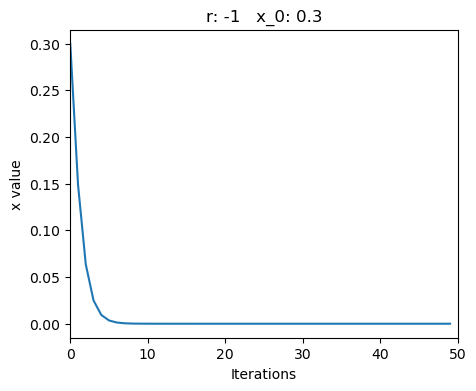

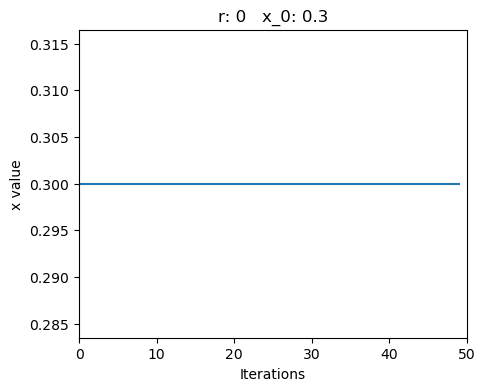

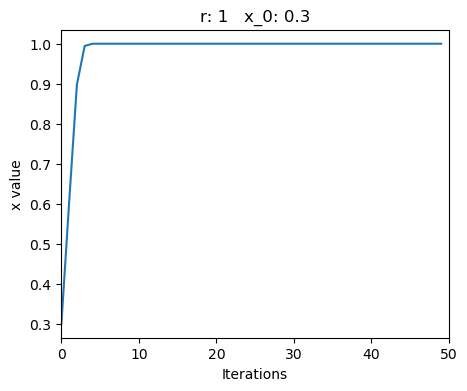

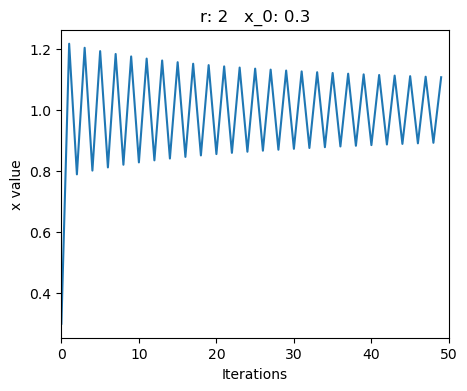

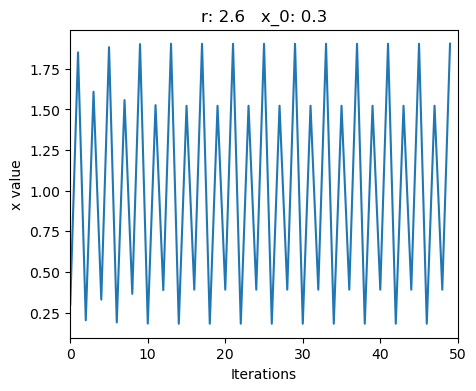

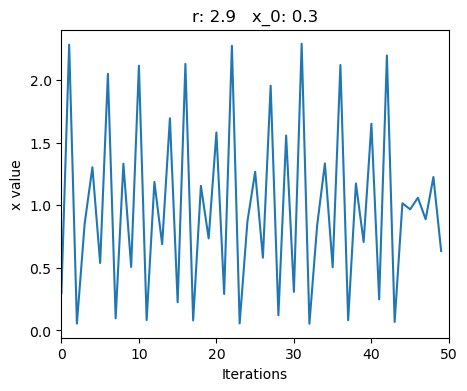

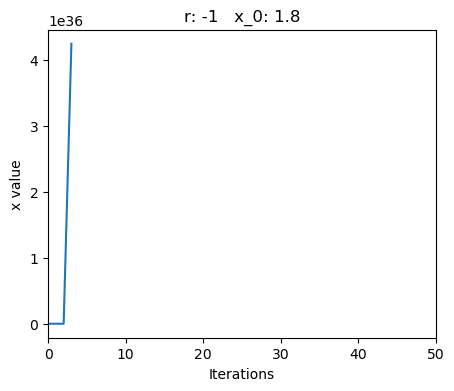

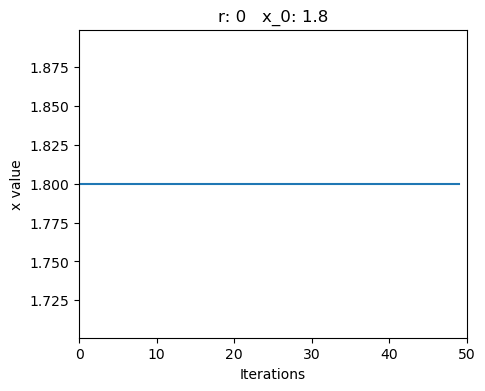

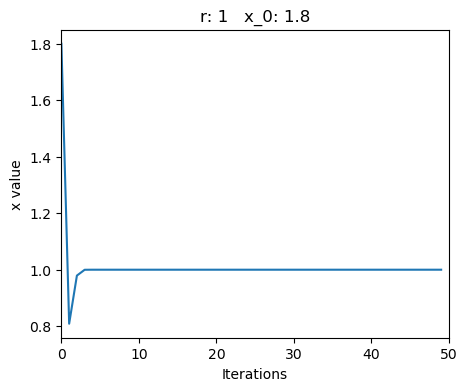

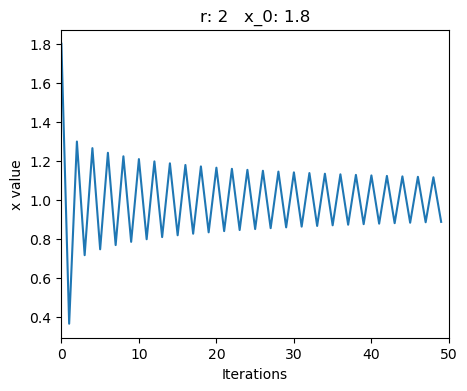

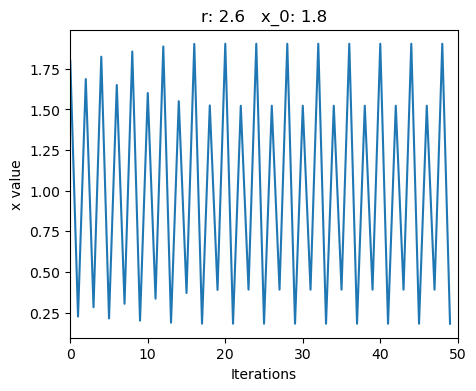

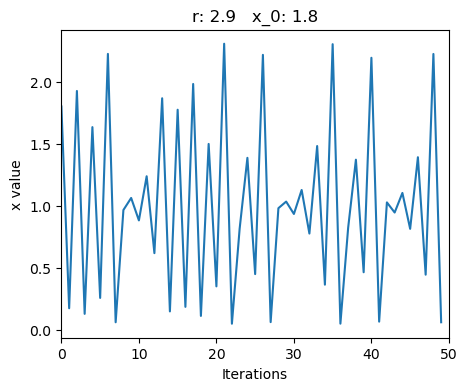

In [97]:
r_list = [-1, 0, 1, 2, 2.6, 2.9]
x_0_list = [0.3, 1.8]

for x_0 in x_0_list:
    for r in r_list:
        plot_x_values(x_0 = x_0, r=r)
        #plt.savefig(fname = "my_plot_{}.jpg".format(r_list.index(r)+1), dpi = 200)

When *r* < 1, *Xt* = 0 behaves as an attractor for 0 < *Xt* < 1, but when *Xt* > 1, the function grows to infinite repelled by the fixed point *Xt* = 1. When *r* ranges between *r* = 1 and *r* = 2, the function stabilizes in a fixed value *Xt* = 1. For *r* = 2, the function oscillates between two values in a periodic way. As we increase the value of *r*, the function changes its danamics, so that at *r* = 2.6 the function shows a regular oscillatory between four values. For *r* = 2.9, the function shows a non-periodical erratic behaviour.

5. Plot examples of the cobweb plot (also return map or graph for xn+1 versus xn) for different regimes.

In [98]:
### This code has been adapted from https://scipython.com/blog/cobweb-plots/

def plot_cobweb(r, x0, nmax=100):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, 3, 500)
    fig, ax = plt.subplots(dpi=100, figsize=(5, 4))

    # Plot y = f(x) and y = x
    ax.plot(x, x*np.exp(r*(1-x)), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = (px[n-1]*np.exp(r*(1-px[n-1])))
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', lw = 1, alpha=0.7)
    
     # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$Xt$')
    ax.set_ylabel('$Xt+1$')
    plt.title('$x_0 = {}, r = {}$'.format(x0,r))


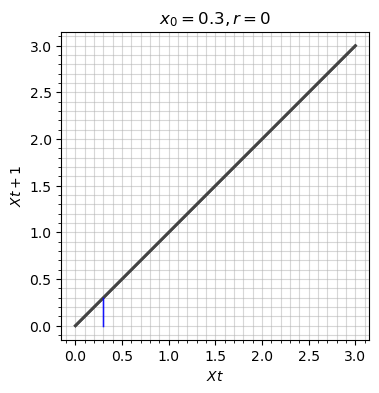

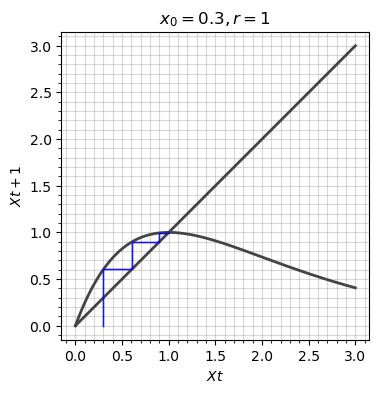

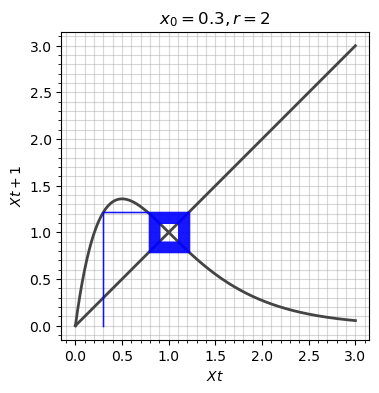

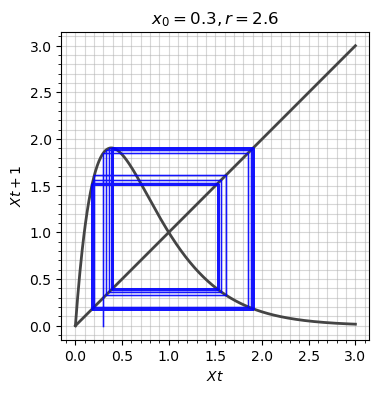

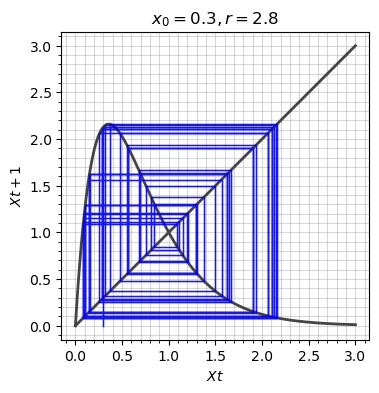

In [99]:
r_list = [0, 1, 2, 2.6, 2.8]
for r in r_list:
    plot_cobweb(r = r, x0 = 0.3)

6. Can you solve the equation for period-2 dynamics? Can you try to calculate its stability? Hint: The equations can become cumbersome in some cases, so this may not always be feasible.

The equationg for period-2 dynamics can be expressed as *Xt+2* = *F(Xt)*. It can be deduced from the original period-1 equation *Xt+1* = *F(X)*, replacing *Xt* by *F(Xt)* in every position, so that:

In [100]:
'''
Xt+2 = F(Xt) = Xt+1 * exp(r * (1 - Xt+1)) = [Xt * exp(r * (1-Xt))] * exp(r * (1 - [Xt * exp(r * (1 - Xt))] ))

'''

'\nXt+2 = F(Xt) = Xt+1 * exp(r * (1 - Xt+1)) = [Xt * exp(r * (1-Xt))] * exp(r * (1 - [Xt * exp(r * (1 - Xt))] ))\n\n'

In order to identify fixed points, we need to solve the equation *Xt+2* = *Xt*. I tried to do this through online calculators such as Symbolab or Wolframalpha, and using Python packages, but I did not manage to solve the equation.

\begin{split}\begin{aligned}
\:\left(xe^{r\left(1-x\right)}\right)e^{r\left(1-\left(xe^{r\left(1-x\right)}\right)\right)}=x\quad 
\end{aligned}\end{split}

In view of this, I will try to represent the intersections between *Xt+2* = *Xt* function and the *x* = *y* line.

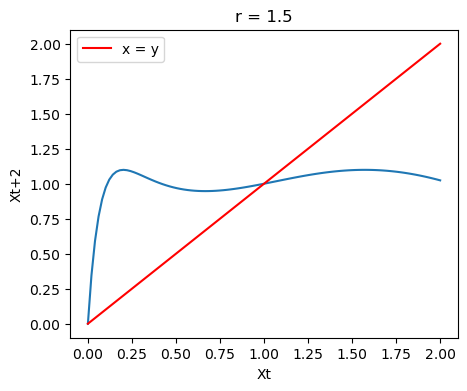

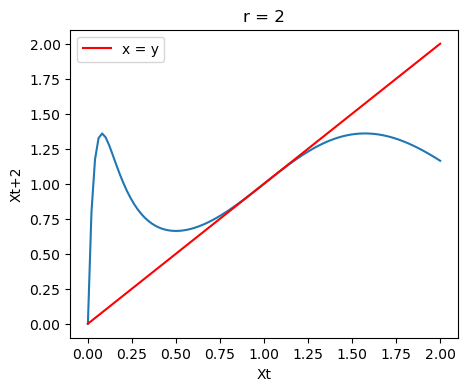

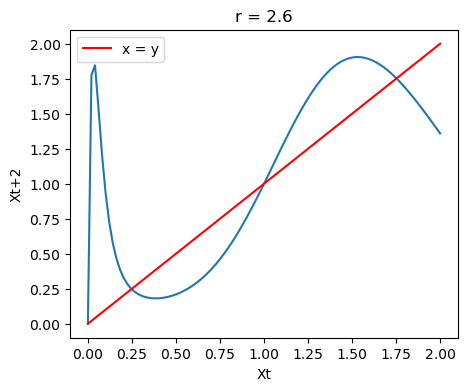

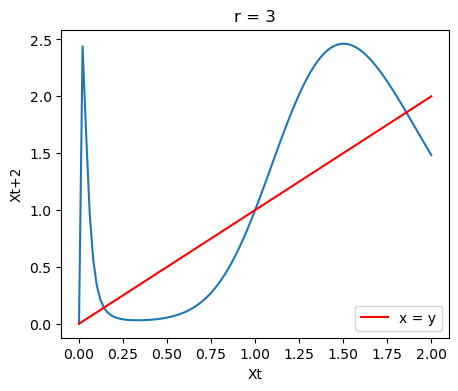

In [125]:
for r in [1.5, 2, 2.6, 3]:
    Xt2 = []
    fig = plt.figure(dpi=100, figsize=(5, 4))
    x_list = np.linspace(0, 2, 100)

    for x in x_list:
        y = (x * exp(r * (1-x))) * exp(r * (1 - (x * exp(r * (1 - x))) ))
        Xt2.append(y)

    plt.plot(x_list, Xt2)
    plt.plot(x_list, x_list, 'r-', label = "x = y")
    plt.xlabel("Xt")
    plt.ylabel("Xt+2")
    plt.title(f"r = {r}")
    plt.legend()

We can observe how the function curves as *r* gets a higher value, going from two (*X* = 0 and *X* > 0) to four intersection points when *r* > 2. As we already know, at some point when 2 < *X* < 3, some fixed points become unstable and a stochastic chaotic behavour appears in the system.

7. Plot the bifurcation diagram (discard transients and represent values of xn for a number of time steps at each value of r).

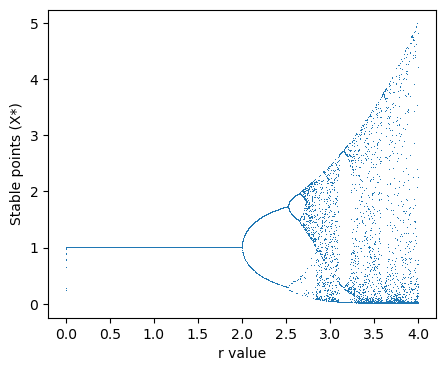

In [64]:
x_values = []
y_values = []

for r in np.linspace(0,4,10000):

    x_values.append(r)    # Start with a random value of r 
    x = np.random.random()
    for n in range(1001):
      x = x*np.exp(r*(1-x))

    y_values.append(x)
# Remove the line between successive data points, this renders
# the plot illegible. Use a small marker instead.
plt.figure(dpi=100, figsize=(5, 4))
plt.plot(x_values, y_values, ls = "", marker=',')
plt.ylabel("Stable points (X*)")
plt.xlabel("r value")
plt.show()

8. Calculate the Lyapunov exponent for different values of r.


Text(0.5, 1.0, 'r values v.s. Lyapunov exponent')

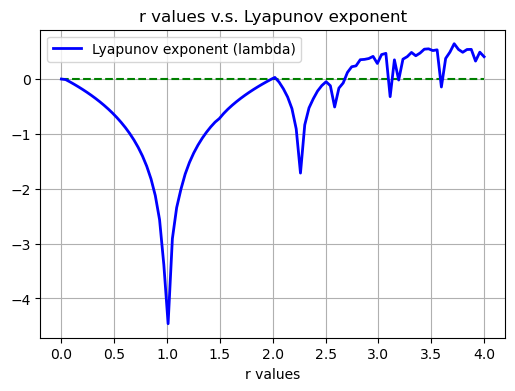

In [126]:
'''
Code adapted from the http://systems-sciences.uni-graz.at/etextbook/sw2/lyapunov.html , where you can find a very good description of the Lyapunov
exponent.

'''
import numpy as np
import matplotlib.pyplot as plt

lambdas = []

# define range of r 
r_values = np.linspace(0, 4, 100)

# Iterate through the different r values. 
for r in r_values:
    result = []
    x = 0.2

    # Iterate system 100 times and append the natural logarithms of the absolute value of F'(Xt)
    for i in range(100):
        result.append(np.log(np.abs((1 - r * x) * np.exp(r * (1 - x)))))
        x = x * np.exp(r * (1 - x))

    # Calculate lambda for each r value. Lambda is the arithmetic mean of the sumatory (sum(Xi)/2)
    lambdas.append(np.mean(result))  
    
fig = plt.figure(dpi=100, figsize=(6, 4))
ax1 = fig.add_subplot(1,1,1)

# Add lambda = 0 baseline
ax1.plot(r_values, [0]*len(r_values), 'g--')

# Plot Lyapunov exponent
ax1.plot(r_values, lambdas, 'b-', linewidth = 2, label = 'Lyapunov exponent (lambda)')

ax1.grid('on')
ax1.set_xlabel('r values')
ax1.legend(loc='best')
ax1.set_title('r values v.s. Lyapunov exponent')